In [1]:
import pickle
import gzip
import numpy as np

In [2]:
# Looking at the logits that are outputted and analyzing them. 

prompt_wanted = 78

prompt_length = 100

#vals_dict = {'tfs':[0.01 ] }

#updated
vals_dict = {'tfs':[0.25, 0.75, 0.9, 0.95, 0.99], 'flat':[0.01, 0.02, 0.05],
'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  }


In [3]:
for key, params in vals_dict.items():
    for par in params:
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        break
    break

In [4]:
rand_selects

array([ 5139,  3768,  3912, 14879,  4848, 13605,  7192,  4237, 11121,
        1026,  8831,  8895,  9386,  8417, 10926, 12170,   689, 11198,
        5558, 14495,  9743,  3571, 10490, 15136, 14165,  5939,  1996,
        5117,  7427,  1754,  8566,  8908,  3902,  7495, 11357,  5927,
       14523,  7528, 11829, 12279, 14369,  3906,  3151,  9904,  9827,
       12211, 12933,  3498,  9235,  6581, 14304, 14487,  5428, 11345,
        7185, 10007,  5472,  4487,   540, 11144,  7012,  4381, 12873,
        7952,  2756, 11068, 15111,  6720, 10393,  3551, 14269, 12066,
        2866, 10860,  7183, 11955, 13936,  7243, 14593,  9269,  3369,
        9500,  2613,  1021,  3822,  7491,  9998,  6938,  1582,  7865,
        2662,  9045,  1324, 11431,  9123, 11092,  2847, 13290,   653,
        1838])

In [5]:
all_logits[0].shape

(25, 50257, 150)

In [6]:
# used to decode:
batch_size = 25
from decodeLogits import *
batch = prompt_wanted//batch_size
ind = prompt_wanted - batch*batch_size

print(batch, ind)

tokens = []
for time_point in range(all_logits[0].shape[2]):
    tokens.append(np.argmax(all_logits[batch][ind, :, time_point]))
decoder_text(tokens)

3 3


" look up at the weapon, and it's gone. I look up at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon,"

In [7]:
text[0].shape

(25, 250)

In [8]:


import encoder
model_name='345M'
models_dir='../gpt-2/models'
enc = encoder.get_encoder(model_name, models_dir)

prompts=pd.read_csv('test_dataframe_500primer.csv')

enc.encode('!')

[0]

In [9]:
choose_prompt =rand_selects[prompt_wanted]
choose_prompt

14593

In [10]:
prompts.iloc[choose_prompt].Prompt

"[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy. \n **BOOM** \n \n **CRASH** \n \n I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished

In [11]:
prompts.iloc[choose_prompt].test_target

"**BOOM** \n \n **CRASH** \n \n I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished. Over the years, Echelon grew, and so did the population. The buildings became closer and higher until you couldn ’ t see the sky anymore. It got so bad that 

In [12]:
prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)
target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 


In [13]:
decoder_text(target)

" pick it up and keep running. Suddenly, I hear an explosion behind me. I can ’ t help but turn around. \n \n Cataclysm is floating through the street towards me, fire and smoke trailing in his path. He has a wicked smile on his face. He raises a hand at me, and a bolt of lightning travels right by me. I stumble backwards and turn down a side street. Luckily, I knew these roads like the back of my hand. \n \n I grew up here in Lower Echelon. It ’ s where the scum of humanity come to die. But it is my home, and I wouldn ’ t trade it for anything. I was left here for dead as a child, but I survived, even flourished. Over the years, Echelon grew, and so did the population. The buildings became closer and higher until you couldn ’ t see the sky anymore. It got so bad that the police had to develop special helicopters to drop down officers and reinforcements. But recently, they have n't been doing much, not with their hero Cataclysm cleaning up the streets. \n \n I dash into a close buildin

In [14]:
enc.encode('dist')

[17080]

In [15]:
par

0.25

In [16]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

#time_point = 1
plot_window_lim =30

def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()


print('Prompt: \n')
print(decoder_text( text[batch][ind, :prompt_length]))
print('\n ====== \n ')
print('Generation: \n ')
gen = text[batch][ind, prompt_length:]
print(decoder_text( text[batch][ind, prompt_length:]))
print('======')

target_prob_assigned = []

for time_point in range(0,50):

    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
    indices = np.argsort(-all_logits[batch][ind, :, time_point])

    if key == 'tfs':
        if par != 'None':
            sps_tfs = ema_eff(par, sps, perc_acc=0.99 )
            sps_round= np.around(sps_tfs,2) # ROUNDING UP THE SPS!

        else: 
            sps_round= np.around(sps,2) # ROUNDING UP THE SPS!

        first = sps_round[1:] - sps_round[:-1]
        second = first[1:] - first[:-1]
        tail_id = second.shape[0]-np.argmax(np.flip(second)>0.001)    
    
    target_plot_index = np.where(target[time_point]==indices)[0][0] # this is the position in the indices where the word matches. 
    
    print('target word', decoder_text([target[time_point]]))

    #finding the tail without any alpha first
    ids_above_tail = indices[:tail_id] # use these indices to determine what the words are and their probabilities. 
    tail_free_probs = softmax(all_logits[batch][ind, ids_above_tail, time_point]) # it is already applying the softmax too
    
    target_prob_assigned.append(sps[target_plot_index]) # storing the probability given to the real word. 

    print('tail value', tail_id)
    print('target index', target_plot_index)

    plt.plot(np.arange(sps.shape[0]),sps)
    plt.xlim([0,plot_window_lim])
    plt.axvline(tail_id, color='purple', linestyle='solid')
    plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(plot_window_lim), decoder_text(indices[:plot_window_lim]).split(' ')[1:], rotation='vertical')
    plt.title('Tail Free Thresh')
    plt.show()

    plt.plot(np.arange(tail_free_probs.shape[0]), tail_free_probs)
    plt.title('Tail Free Probs')
    if target_plot_index in ids_above_tail:
        plt.axvline(target_plot_index, color='yellow', linestyle='dotted')
    plt.xticks(np.arange(tail_free_probs.shape[0]), decoder_text(ids_above_tail).split(' ')[1:], rotation='vertical')
    plt.show()

    #print('words in order',decoder_text(ids_above_tail))

    print('=============')

Prompt: 

[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy. 
 **BOOM** 
 
 **CRASH** 
 
 I fall hard on the pavement. Taking a few seconds, I scramble to my feet, coughing smoke out of my lungs. The weapon is a few feet away. It ’ s a large syringe filled with a purple liquid. I

 
Generation: 
 
 look down at the weapon, and it's gone. I look up at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon, and it's gone. I look down at the weapon,
target word  pick
tail value 32
target index 34


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  it
tail value 12
target index 7


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  up
tail value 9
target index 108


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  and
tail value 5
target index 37


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  keep
tail value 23
target index 4387


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  running
tail value 12
target index 264


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word .
tail value 26
target index 512


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  Suddenly
tail value 21
target index 3505


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word ,
tail value 17
target index 35


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  I
tail value 20
target index 484


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  hear
tail value 6
target index 10185


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  an
tail value 14
target index 1484


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  explosion
tail value 33
target index 6779


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  behind
tail value 9
target index 9


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  me
tail value 7
target index 196


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word .
tail value 4
target index 576


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  I
tail value 20
target index 610


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  can
tail value 8
target index 959


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  �
tail value 7
target index 62


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word �
tail value 10
target index 37860


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  t
tail value 7
target index 175


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  help
tail value 11
target index 3621


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  but
tail value 5
target index 70


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  turn
tail value 13
target index 14748


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  around
tail value 22
target index 3135


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word .
tail value 8
target index 47


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  
tail value 6
target index 211


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word 

tail value 4
target index 128


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  
tail value 3
target index 330


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word 

tail value 4
target index 62


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  Cat
tail value 1
target index 5129


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word aclysm
tail value 5
target index 41125


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  is
tail value 2
target index 1


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  floating
tail value 1
target index 276


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  through
tail value 2
target index 84


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  the
tail value 12
target index 102


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  street
tail value 19
target index 4054


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  towards
tail value 6
target index 14


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  me
tail value 3
target index 135


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word ,
tail value 2
target index 17


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  fire
tail value 1
target index 162


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  and
tail value 2
target index 2


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  smoke
tail value 1
target index 772


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  trailing
tail value 3
target index 10518


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  in
tail value 1
target index 103


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  his
tail value 1
target index 234


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  path
tail value 1
target index 2771


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word .
tail value 6
target index 376


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  He
tail value 11
target index 1316


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

target word  has
tail value 4
target index 941


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Getting the probability assigned to the ground truth over time. 

In [17]:
time_point

49

In [18]:
all

<function all(iterable, /)>

In [19]:
all_logits[batch][ind, :, time_point].shape

(50257,)

In [20]:
prompts.iloc[choose_prompt].test_source

'[WP] Write a story where the antagonist is doing something obviously horrible, but by the end of the story make me want to side with him over the good guy.'

In [21]:
len(prompts.iloc[choose_prompt].test_target.split(' '))

716

In [22]:
len(prompts.iloc[choose_prompt].Prompt.split(' '))

531

In [23]:
sps[target[time_point]]

1.7974095e-06

In [24]:
def nucleus_calc(vals, thresh ):
    return np.argmax(np.cumsum(vals)>thresh)+1

def new_tfs(second, thresh):
    only_pos = np.abs(second)
    sec_indices = np.arange(len(second))
    sec_weights = only_pos/only_pos.sum()
    tail_id = np.argmax(np.cumsum(sec_weights)>thresh)+1
    return tail_id
        
def flat(sps, p):
    return sps.shape[0]-np.argmax(np.flip(sps)>p)

In [27]:
sps.shape

(50257,)

In [29]:
time_point

128

In [32]:
len(target)

128

In [33]:
target[time_point]

IndexError: list index out of range

In [28]:
sps[target[time_point]]

IndexError: list index out of range

In [34]:
del all_logits

import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

num_samples = 100
batch_size = 25
num_batches = num_samples//batch_size

ground_token_in_cut = dict()
ground_truth_probs = dict()
generation_log_probs = dict()
generation_perplexity = dict()

all_tail_ids = dict()
all_tail_cdfs = dict()

num_target_too_short = 0

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        if par ==None:
            par = "None"
        print('opening file:', 'gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz')
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))

        temp_tail_cdfs = np.zeros([num_samples, all_logits[0].shape[2]])
        temp_tail_ids = np.zeros([num_samples, all_logits[0].shape[2]])
        
        for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
            for ind in range(0,batch_size):
                
                p_ind = ind+(batch_size*batch)
                
                if p_ind%25 == 0:
                    print('index', str(p_ind))
                    
                # this is the ground truth calculations =====

                choose_prompt =rand_selects[p_ind]
                prompt_target_encoded = enc.encode(prompts.iloc[choose_prompt].Prompt)
                target = prompt_target_encoded[prompt_length:] # encode and get the prompt length. The rest is the ground truth. 

                if len(target) < all_logits[0].shape[2]: # some of the prompts ground truth completions
                    #are too short for the timepoint.
                    num_target_too_short+=1
                    #print('skipping as ground truth is too short for the array that I am using the store an plot the info.')
                    continue
                
                target_prob_assigned = []
                generation_log_probs_temp = []
                generation_perp_temp = []
                ground_token_in_cut_temp = []

                for time_point in range(0,all_logits[0].shape[2]):
                    #print(time_point)

                    sps = softmax(all_logits[batch][ind, :, time_point])
                    
                    target_prob_assigned.append(sps[target[time_point]])
                    token_chosen = text[batch][ind, time_point]
                    
                    log_prob_here = np.log(sps[token_chosen])
                    generation_log_probs_temp.append(log_prob_here)
                    
                    #getting and storing perplexity here
                    # correcting for zeros but only inside the log.
                    generation_perp_temp.append(  np.power(2,  -np.sum( sps*np.log2(sps+0.000000001) ))  )
                    
                    # this is the tail and CDF calculations ======
                    
                    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
                    indices = np.argsort(-all_logits[batch][ind, :, time_point])
                    
                    if key == 'tfs':
                        first = sps[1:] - sps[:-1]
                        second = first[1:] - first[:-1]
                        tail_id = new_tfs(second, par)
                    elif key=='flat':
                        tail_id = flat(sps, par)
                    elif key=='n':
                        tail_id = nucleus_calc(sps, par)
                    elif key=='k':
                        tail_id = par
                    else:
                        print('key not recognized')
                        break

                    tail_cdf= np.sum(sps[:tail_id])

                    temp_tail_ids[p_ind, time_point] = tail_id
                    temp_tail_cdfs[p_ind, time_point] = tail_cdf
                    
                    ids_above_tail = indices[:tail_id]
                    ground_token_in_cut_temp.append( target[time_point] in ids_above_tail )
                    
                ground_token_in_cut[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = ground_token_in_cut_temp
                ground_truth_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = target_prob_assigned
                generation_log_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = generation_log_probs_temp
                generation_perplexity[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)] = generation_perp_temp

        all_tail_ids[key+'-sampling-type_'+str(par)] = temp_tail_ids
        all_tail_cdfs[key+'-sampling-type_'+str(par)] = temp_tail_cdfs

        print('number of prompts where the target is too short for this param', num_target_too_short)


Key is: tfs
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.25-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 8
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.75-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 16
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.9-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 24
opening file: gpt-2_output/all_logits_tfs-sampling-type_0.95-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz
index 0
index 25
index 50
index 75
number of prompts where the target is too short for this param 32
opening file: gpt-2_output

In [35]:
pickle.dump(all_tail_ids, gzip.open('NewTFS_and_Flat_Tail_IDs_dict_Aug5.pickle', 'wb'))
pickle.dump(all_tail_cdfs, gzip.open('NewTFS_and_Flat_Tail_CDFs_dict_Aug5.pickle', 'wb'))
pickle.dump(ground_token_in_cut, gzip.open('NewTFS_and_Flat_GTruth_In_Cut_Aug5.pickle', 'wb'))
pickle.dump(ground_truth_probs, gzip.open('NewTFS_and_Flat_Ground_Truth_Probs_For_Each_Generation_Aug5.pickle', 'wb'))
pickle.dump(generation_log_probs, gzip.open('NewTFS_and_Flat_Generated_Token_Log_Probs_Aug5.pickle', 'wb'))
pickle.dump(generation_perplexity, gzip.open('NewTFS_and_Flat_Generated_Perplexities_Aug5.pickle', 'wb'))

In [25]:
all_tail_ids = pickle.load(gzip.open('NewTFS_and_Flat_Tail_IDs_dict_Aug5.pickle', 'rb'))
all_tail_cdfs = pickle.load(gzip.open('NewTFS_and_Flat_Tail_CDFs_dict_Aug5.pickle', 'rb'))
ground_token_in_cut=pickle.load(gzip.open('NewTFS_and_Flat_GTruth_In_Cut_Aug5.pickle', 'rb'))
ground_truth_probs=pickle.load(gzip.open('NewTFS_and_Flat_Ground_Truth_Probs_For_Each_Generation_Aug5.pickle', 'rb'))
generation_log_probs=pickle.load(gzip.open('NewTFS_and_Flat_Generated_Token_Log_Probs_Aug5.pickle', 'rb'))
generation_perplexity=pickle.load(gzip.open('NewTFS_and_Flat_Generated_Perplexities_Aug5.pickle', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'NewTFS_and_Flat_Tail_IDs_dict_Aug5.pickle'

### Load in and compute the perplexities and probabilities of real completion

In [37]:
del all_logits
gpt_out_path = 'gpt-2_output/'
all_perps = pickle.load( gzip.open(gpt_out_path+'all_perplexities_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb'))
all_logits = pickle.load( gzip.open(gpt_out_path+'all_logits_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb')) # needed to get the probabilities
text = pickle.load( gzip.open(gpt_out_path+'all_text_perplexity_scores_for_the_dataset_Human_StoryPrompts_Completion.csv.pickle.gz', 'rb'))

In [38]:
all_perps[0].shape

(20, 150)

In [48]:
all_perps[0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [39]:
len(text[0])

20

In [40]:
all_logits[0].shape

(20, 150, 50257)

In [41]:
num_batches = 4

In [42]:
# getting probs assigned to the generated text
real_log_probs = dict()
for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
    for ind in range(0,all_logits[batch].shape[0]):
        p_ind = ind+(batch_size*batch)
        real_log_probs_temp=[]
        for time_point in range(0,all_logits[0].shape[1]):
            sps = softmax(all_logits[batch][ind, time_point, : ])
            token_chosen = text[batch][ind][time_point]
            log_prob_here = np.log(sps[token_chosen])
            real_log_probs_temp.append(log_prob_here)
            
        real_log_probs['real_text_prompt_'+str(p_ind)] = real_log_probs_temp

## Plotting average perplexity and log probs

In [44]:
vals_dict

{'tfs': [0.25, 0.75, 0.9, 0.95, 0.99],
 'flat': [0.01, 0.02, 0.05],
 'n': [0.1, 0.25, 0.5, 0.75, 0.9],
 'k': [1, 10, 40, 200]}

Key is: tfs
tfs-sampling-type_0.25_prompt
variance of tfs param 0.25 is: 2243.8506098901094
tfs-sampling-type_0.75_prompt
tfs-sampling-type_0.9_prompt
tfs-sampling-type_0.95_prompt
variance of tfs param 0.95 is: 859.0882781023406
tfs-sampling-type_0.99_prompt
Key is: flat
flat-sampling-type_0.01_prompt
flat-sampling-type_0.02_prompt
flat-sampling-type_0.05_prompt
Key is: n
n-sampling-type_0.1_prompt
n-sampling-type_0.25_prompt
n-sampling-type_0.5_prompt
n-sampling-type_0.75_prompt
n-sampling-type_0.9_prompt
Key is: k
k-sampling-type_1_prompt
variance of k param 1 is: 2342.1474955541953
k-sampling-type_10_prompt
k-sampling-type_40_prompt
k-sampling-type_200_prompt
variance of k param 200 is: 785.4276314434558


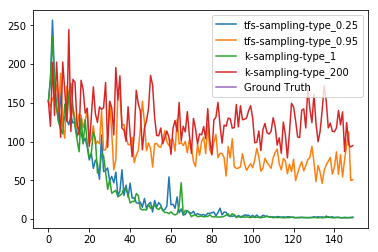

In [45]:
params_to_plot = ['tfs_0.25', 'tfs_0.95', 'k_1', 'k_200'] #None prints all of them

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in range(num_samples):
            
            try:
                vals_to_plot.append(generation_perplexity[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                pass
                #print('couldnt load in as not here.')
        vals_to_plot = np.asarray(vals_to_plot)
        
        #if key == "k" and str(par)=='1':
        '''plt.plot(vals_to_plot.T)
        plt.show()'''
        if params_to_plot == None: 
            plt.plot(vals_to_plot.mean(axis=0), label=key+'-sampling-type_'+str(par))
        else:
            
            if key+'_'+str(par) in params_to_plot:
                print('variance of', key, 'param', str(par), 'is:', vals_to_plot.mean(axis=0).var()  )
                plt.plot(vals_to_plot.mean(axis=0), label=key+'-sampling-type_'+str(par))

for batch in range(num_batches):
            #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
    #for ind in range(0,all_perps[batch].shape[0]):
    if batch==0:
        vals_to_plot = all_perps[batch]
    else: 
        vals_to_plot = np.concatenate((vals_to_plot,all_perps[batch]), axis=0 )

plt.plot(vals_to_plot.mean(axis=0), label='Ground Truth')
                
plt.legend()
plt.show()

In [47]:
vals_to_plot

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

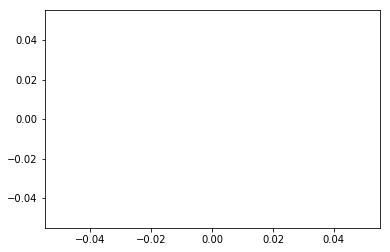

In [46]:
plt.plot(vals_to_plot.mean(axis=0), label='Ground Truth')

In [43]:
num_samples = 100

Key is: tfs
tfs-sampling-type_None_prompt
variance of tfs param None is: 0.69600624
tfs-sampling-type_0.01_prompt
tfs-sampling-type_0.05_prompt
variance of tfs param 0.05 is: 0.66229194
tfs-sampling-type_0.1_prompt
tfs-sampling-type_0.5_prompt
tfs-sampling-type_0.75_prompt
Key is: n
n-sampling-type_0.1_prompt
n-sampling-type_0.25_prompt
n-sampling-type_0.5_prompt
n-sampling-type_0.75_prompt
n-sampling-type_0.9_prompt
Key is: k
k-sampling-type_1_prompt
variance of k param 1 is: 2.7556703
k-sampling-type_10_prompt
k-sampling-type_40_prompt
k-sampling-type_200_prompt


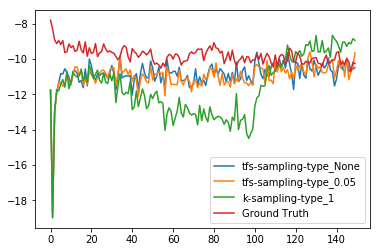

In [51]:
params_to_plot = ['tfs_0.05', 'tfs_None', 'k_1'] #None prints all of them

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in range(num_samples):
            try:
                vals_to_plot.append(generation_log_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                pass
                #print('couldnt load in as not here.')
        vals_to_plot = np.asarray(vals_to_plot)
        
        #if key == "k" and str(par)=='1':
        '''plt.plot(vals_to_plot.T)
        plt.show()'''
        if params_to_plot == None: 
            plt.plot(vals_to_plot.mean(axis=0), label=key+'-sampling-type_'+str(par))
        else:
            if key+'_'+str(par) in params_to_plot:
                print('variance of', key, 'param', str(par), 'is:', vals_to_plot.mean(axis=0).var()  )
                plt.plot(vals_to_plot.mean(axis=0), label=key+'-sampling-type_'+str(par))
vals_to_plot = []
for key, values in real_log_probs.items():
    vals_to_plot.append(values)
vals_to_plot = np.asarray(vals_to_plot)
plt.plot(vals_to_plot.mean(axis=0), label='Ground Truth')
                
plt.legend()
plt.show()

# Mean Probs Given to ground truth words

In [ ]:
global_mean = dict()
for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        print(key+'-sampling-type_'+str(par)+'_prompt')
        vals_to_plot = []
        for p_ind in range(num_samples):
            
            try:
                vals_to_plot.append(ground_truth_probs[key+'-sampling-type_'+str(par)+'prompt_'+str(p_ind)])
            except:
                pass
                #print('couldnt load in as not here.')
        vals_to_plot = np.asarray(vals_to_plot)
        
        if key == "k" and str(par)=='1':
            plt.plot(vals_to_plot.T)
            plt.show()
            plt.plot(vals_to_plot.mean(axis=0))
            plt.show()
        
        global_mean[key+'-sampling-type_'+str(par)+'_prompt'] = vals_to_plot.mean() 
        print('=======')

In [26]:
pickle.dump(global_mean, gzip.open('Probability_given_to_ground_truth_dict_July14.pickle', 'wb'))

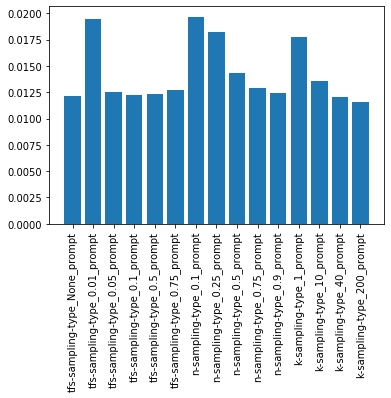

In [27]:
plt.bar(global_mean.keys(), global_mean.values())
plt.xticks(rotation='vertical')
plt.show()

### I could also try to get a binary output for whether or not the true word was above the tail id.

# Getting the Tail ID positions and CDFs, NB this is for different prob dists for each. 

Need to run for the same one
And get binary output for if the true word is above the tail id or not.

In [28]:
'''#del all_logits

import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import numpy as np
import torch

num_samples = 100
batch_size = 25
num_batches = num_samples//batch_size

vals_dict = {'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40, 200],  'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}

def nucleus_calc(thresh, vals):
    return np.argmax(np.cumsum(vals)>thresh)+1

def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()

all_tail_ids = dict()
all_tail_cdfs = dict()

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        
        print(key+'-sampling-type_'+str(par))
        if par ==None:
            par = "None"
        all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
        #rand_selects = pickle.load( gzip.open('gpt-2_output/prompt_rand_selections_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))

        temp_tail_cdfs = np.zeros([num_samples, all_logits[0].shape[2]])
        temp_tail_ids = np.zeros([num_samples, all_logits[0].shape[2]])

        for batch in range(num_batches):
        #for p_ind in range(batch*batch_size, (batch*batch_size)+batch_size ):
            for ind in range(0,batch_size):

                arr_ind = ind+(batch_size*batch)

                if arr_ind%25 == 0:
                    print('index', str(arr_ind))

                for time_point in range(0,all_logits[0].shape[2]):

                    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))

                    if key == 'tfs':
                        if par != 'None':
                            sps_tfs = ema_eff(par, sps, perc_acc=0.99 )
                            sps_round= np.around(sps_tfs,2) # ROUNDING UP THE SPS!
                        
                        else: 
                            sps_round= np.around(sps,2) # ROUNDING UP THE SPS!
                        
                        first = sps_round[1:] - sps_round[:-1]
                        second = first[1:] - first[:-1]
                        tail_id = second.shape[0]-np.argmax(np.flip(second)>0.001)
     
                    elif key=='k': 
                        tail_id = par
                        
                    elif key=='n':
                        tail_id = nucleus_calc(par, sps)

                    tail_cdf= np.sum(sps[:tail_id])

                    temp_tail_ids[arr_ind, time_point] = tail_id
                    temp_tail_cdfs[arr_ind, time_point] = tail_cdf
                
        all_tail_ids[key+'-sampling-type_'+str(par)] = temp_tail_ids
        all_tail_cdfs[key+'-sampling-type_'+str(par)] = temp_tail_cdfs
        '''

Key is: n
n-sampling-type_0.1
index 0
index 25
index 50
index 75
n-sampling-type_0.25
index 0
index 25
index 50
index 75
n-sampling-type_0.5
index 0
index 25
index 50
index 75
n-sampling-type_0.75
index 0
index 25
index 50
index 75
n-sampling-type_0.9
index 0
index 25
index 50
index 75
Key is: k
k-sampling-type_1
index 0
index 25
index 50
index 75
k-sampling-type_10
index 0
index 25
index 50
index 75
k-sampling-type_40
index 0
index 25
index 50
index 75
k-sampling-type_200
index 0
index 25
index 50
index 75
Key is: tfs
tfs-sampling-type_None
index 0
index 25
index 50
index 75
tfs-sampling-type_0.01
index 0
index 25
index 50
index 75
tfs-sampling-type_0.05
index 0
index 25
index 50
index 75
tfs-sampling-type_0.1
index 0
index 25
index 50
index 75
tfs-sampling-type_0.5
index 0
index 25
index 50
index 75
tfs-sampling-type_0.75
index 0
index 25
index 50
index 75


In [30]:
'''all_tail_tfs_ids = pickle.load(gzip.open('Tail_IDs_TFS_dict_July14.pickle', 'rb'))
all_tail_tfs_cdfs = pickle.load(gzip.open('Tail_CDFs_TFS_dict_July14.pickle', 'rb'))'''

"all_tail_tfs_ids = pickle.load(gzip.open('Tail_IDs_TFS_dict_July14.pickle', 'rb'))\nall_tail_tfs_cdfs = pickle.load(gzip.open('Tail_CDFs_TFS_dict_July14.pickle', 'rb'))"

In [31]:
# need to have them all compete against each other to see what is the highest in each of the positions. 

very_first = True

#vals_dict = {'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200]  } #'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        
        flat_ids = all_tail_ids[key+'-sampling-type_'+str(par)].flatten()
        flat_cdfs = all_tail_cdfs[key+'-sampling-type_'+str(par)].flatten()

        if very_first ==True:

            tail_id_df = pd.DataFrame({key+'-sampling-type_'+str(par):flat_ids})
            tail_cdf_df = pd.DataFrame({key+'-sampling-type_'+str(par):flat_cdfs})
            very_first=False

        else:

            tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids
            tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs
        

Key is: n
Key is: k
Key is: tfs


In [32]:
'''vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}


for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:


        flat_ids = all_tail_tfs_ids[key+'-sampling-type_'+str(par)].flatten()
        flat_cdfs = all_tail_tfs_cdfs[key+'-sampling-type_'+str(par)].flatten()
        
        tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids
        tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs'''

"vals_dict = {'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}\n\n\nfor key, params in vals_dict.items():\n    print('Key is:', key)\n    for par in params:\n\n\n        flat_ids = all_tail_tfs_ids[key+'-sampling-type_'+str(par)].flatten()\n        flat_cdfs = all_tail_tfs_cdfs[key+'-sampling-type_'+str(par)].flatten()\n\n        \n\n        tail_id_df[key+'-sampling-type_'+str(par)] = flat_ids\n        tail_cdf_df[key+'-sampling-type_'+str(par)] = flat_cdfs"

In [33]:
tail_id_df.head()

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
0                  1.0                   2.0                  6.0   
1                  1.0                   2.0                  4.0   
2                  1.0                   2.0                  4.0   
3                  1.0                   2.0                 17.0   
4                  1.0                   1.0                 24.0   

   n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
0                  31.0                182.0                1.0   
1                  12.0                129.0                1.0   
2                   5.0                 19.0                1.0   
3                  78.0                478.0                1.0   
4                   1.0                306.0                1.0   

   k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
0                10.0                40.0                200.0   
1                10.0                40.0                200.0   
2                10.0                40.0                200.0   
3                10.0                40.0                200.0   
4                10.0                40.0                200.0   

   tfs-sampling-type_None  tfs-sampling-type_0.01  tfs-sampling-type_0.05  \
0                    21.0                     2.0                    13.0   
1                    19.0                     3.0                    11.0   
2                    20.0                     2.0                    10.0   
3                    21.0                     1.0                    21.0   
4                     6.0                     1.0                    18.0   

   tfs-sampling-type_0.1  tfs-sampling-type_0.5  tfs-sampling-type_0.75  
0                   16.0                   19.0                    20.0  
1                   15.0                   20.0                    20.0  
2                   13.0                   18.0                    19.0  
3                   26.0                   32.0                    33.0  
4                   22.0                   28.0                    28.0

In [34]:
tail_cdf_df.head()

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
0             0.195557              0.301073             0.518905   
1             0.224044              0.352960             0.556938   
2             0.274589              0.363976             0.570778   
3             0.486848              0.256738             0.506252   
4             0.645843              0.470392             0.502961   

   n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
0              0.750658             0.900142           0.195557   
1              0.756891             0.900081           0.224044   
2              0.783390             0.901561           0.274589   
3              0.750910             0.900101           0.486848   
4              0.809627             0.900201           0.645843   

   k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
0            0.602061            0.774605             0.906291   
1            0.872809            0.945126             0.975957   
2            0.700612            0.818081             0.901551   
3            0.822745            0.939115             0.981008   
4            0.460595            0.683131             0.854372   

   tfs-sampling-type_None  tfs-sampling-type_0.01  tfs-sampling-type_0.05  \
0                0.708745                0.301073                0.646504   
1                0.863986                0.461498                0.609484   
2                0.771999                0.394901                0.703124   
3                0.466450                0.486848                0.523056   
4                0.921489                0.645843                0.714389   

   tfs-sampling-type_0.1  tfs-sampling-type_0.5  tfs-sampling-type_0.75  
0               0.678875               0.698433                0.703658  
1               0.644702               0.675860                0.675860  
2               0.738674               0.773599                0.778853  
3               0.562913               0.596629                0.601805  
4               0.752935               0.789258                0.789258

In [35]:
tail_id_df.shape

(15000, 15)

In [36]:
tail_id_df.iloc[0].values

array([  1.,   2.,   6.,  31., 182.,   1.,  10.,  40., 200.,  21.,   2.,
        13.,  16.,  19.,  20.])

In [37]:
np.argsort(tail_id_df.iloc[0,:].values)

array([ 0,  5,  1, 10,  2,  6, 11, 12, 13, 14,  9,  3,  7,  4,  8])

In [38]:
# replace this with the Pandas ranking!!!

'''def get_ranking(df):
    ret = []
    for ind in range(df.shape[0]):
        x = df.loc[ind]
        ranked_inds = np.argsort(x.values)
        temp_ret = np.zeros(len(ranked_inds))
        for i in range(len(ranked_inds)):
            temp_ret[ranked_inds[i]] = i+1
    
        ret.append(temp_ret)
    return np.asarray(ret)'''
        
#get_ranking(tail_id_df)

In [ ]:
tail_id_df_ranking = tail_id_df.rank(axis=0, method='average')  # lowest

In [40]:
tail_id_df_ranking.head()

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
0                  1.0                   3.0                  5.0   
1                  1.0                   3.0                  5.0   
2                  1.0                   3.0                  5.0   
3                  1.0                   4.0                  6.0   
4                  1.0                   2.0                 10.0   

   n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
0                  12.0                 14.0                2.0   
1                   8.0                 14.0                2.0   
2                   6.0                 11.0                2.0   
3                  13.0                 15.0                2.0   
4                   3.0                 15.0                4.0   

   k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
0                 6.0                13.0                 15.0   
1                 6.0                13.0                 15.0   
2                 7.0                14.0                 15.0   
3                 5.0                12.0                 14.0   
4                 7.0                13.0                 14.0   

   tfs-sampling-type_None  tfs-sampling-type_0.01  tfs-sampling-type_0.05  \
0                    11.0                     4.0                     7.0   
1                    10.0                     4.0                     7.0   
2                    13.0                     4.0                     8.0   
3                     7.0                     3.0                     8.0   
4                     6.0                     5.0                     8.0   

   tfs-sampling-type_0.1  tfs-sampling-type_0.5  tfs-sampling-type_0.75  
0                    8.0                    9.0                    10.0  
1                    9.0                   11.0                    12.0  
2                    9.0                   10.0                    12.0  
3                    9.0                   10.0                    11.0  
4                    9.0                   11.0                    12.0

In [39]:
tail_id_df_ranking = pd.DataFrame(get_ranking(tail_id_df))
tail_id_df_ranking.columns = tail_id_df.columns

In [41]:
tail_cdf_df_ranking = pd.DataFrame(get_ranking(tail_cdf_df))
tail_cdf_df_ranking.columns = tail_cdf_df.columns

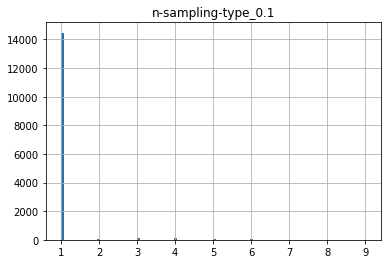

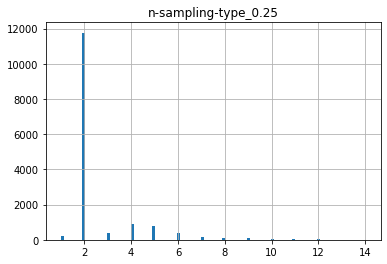

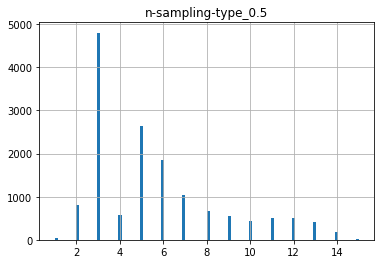

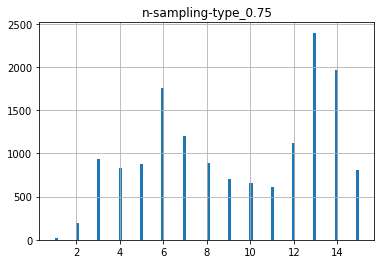

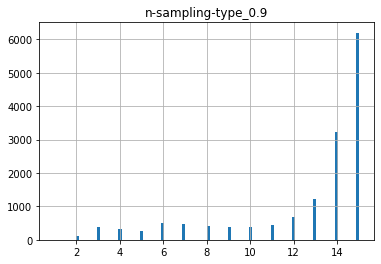

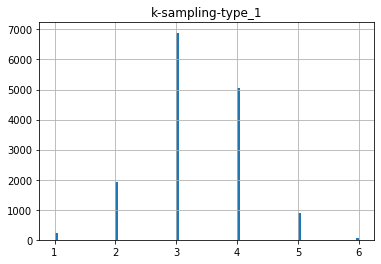

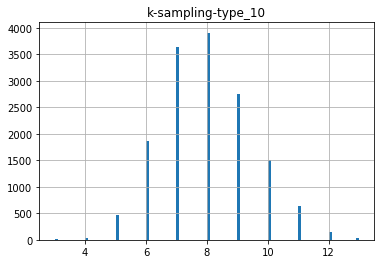

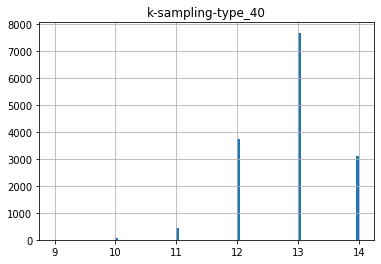

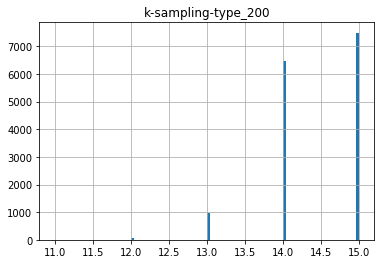

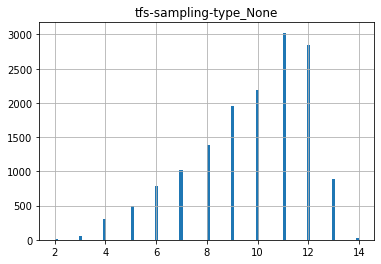

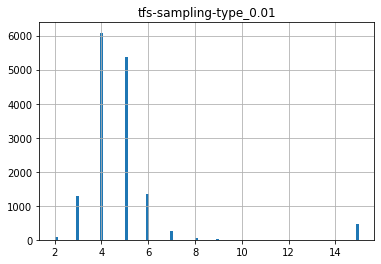

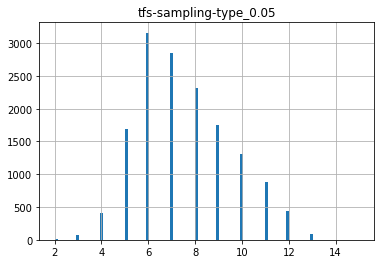

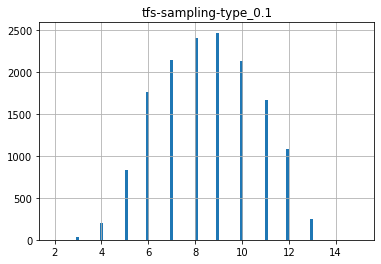

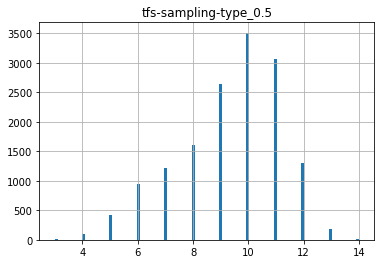

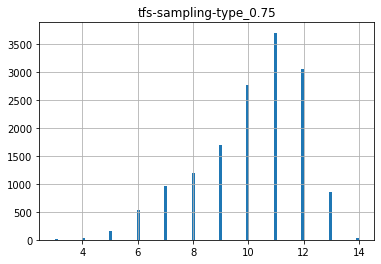

In [42]:
for c in tail_id_df_ranking.columns: 
    
    tail_id_df_ranking[c].hist(bins=100)
    plt.title(c)
    plt.show()

In [45]:
tail_cdf_df.head()

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
0             0.195557              0.301073             0.518905   
1             0.224044              0.352960             0.556938   
2             0.274589              0.363976             0.570778   
3             0.486848              0.256738             0.506252   
4             0.645843              0.470392             0.502961   

   n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
0              0.750658             0.900142           0.195557   
1              0.756891             0.900081           0.224044   
2              0.783390             0.901561           0.274589   
3              0.750910             0.900101           0.486848   
4              0.809627             0.900201           0.645843   

   k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
0            0.602061            0.774605             0.906291   
1            0.872809            0.945126             0.975957   
2            0.700612            0.818081             0.901551   
3            0.822745            0.939115             0.981008   
4            0.460595            0.683131             0.854372   

   tfs-sampling-type_None  tfs-sampling-type_0.01  tfs-sampling-type_0.05  \
0                0.708745                0.301073                0.646504   
1                0.863986                0.461498                0.609484   
2                0.771999                0.394901                0.703124   
3                0.466450                0.486848                0.523056   
4                0.921489                0.645843                0.714389   

   tfs-sampling-type_0.1  tfs-sampling-type_0.5  tfs-sampling-type_0.75  
0               0.678875               0.698433                0.703658  
1               0.644702               0.675860                0.675860  
2               0.738674               0.773599                0.778853  
3               0.562913               0.596629                0.601805  
4               0.752935               0.789258                0.789258

In [46]:
tail_cdf_df.shape

(15000, 15)

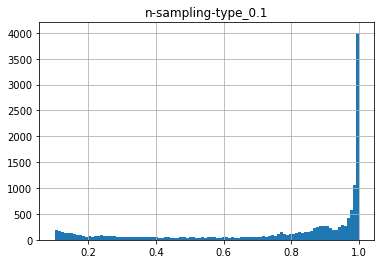

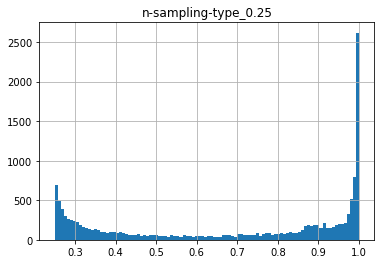

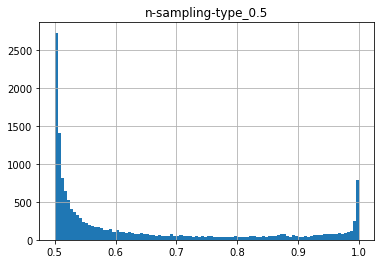

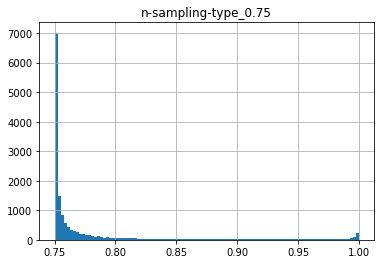

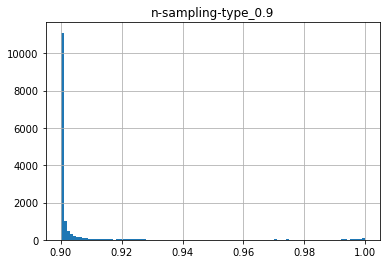

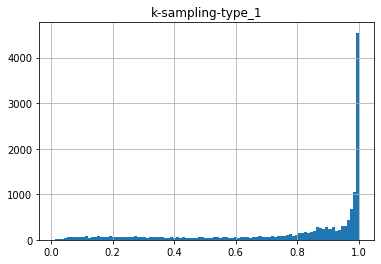

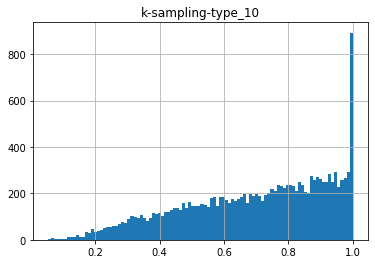

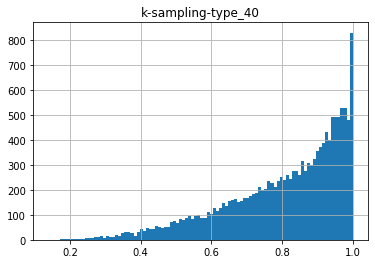

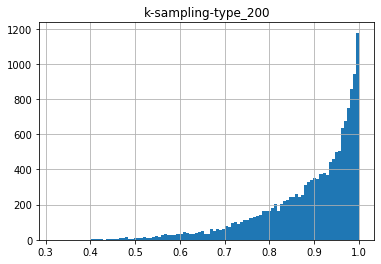

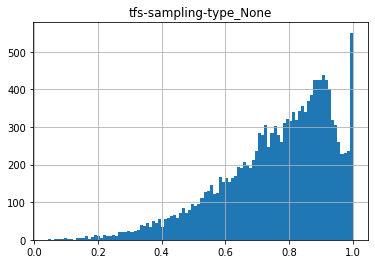

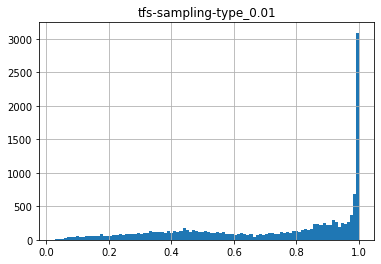

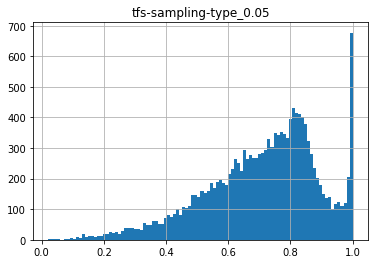

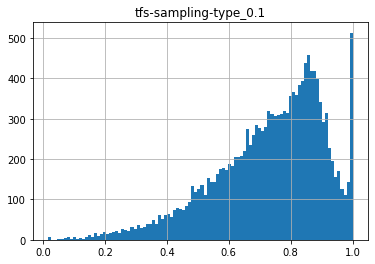

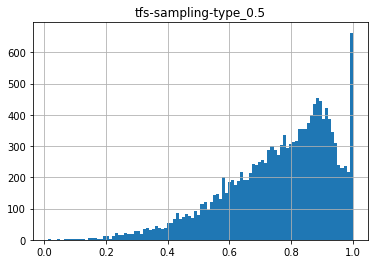

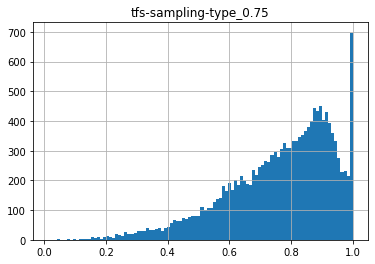

In [44]:
for c in tail_cdf_df.columns: 
    
    tail_cdf_df[c].hist(bins=100)
    plt.title(c)
    plt.show()

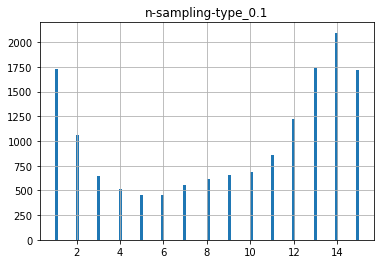

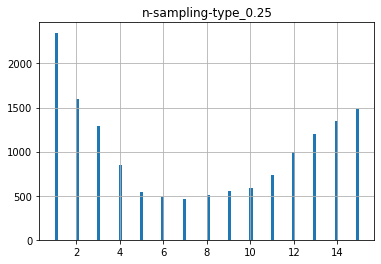

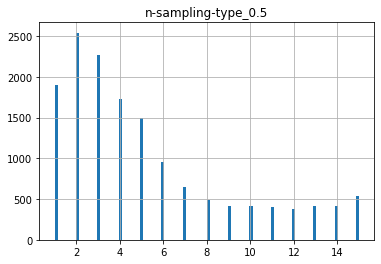

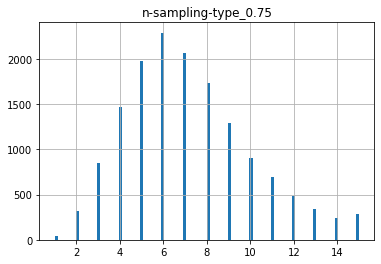

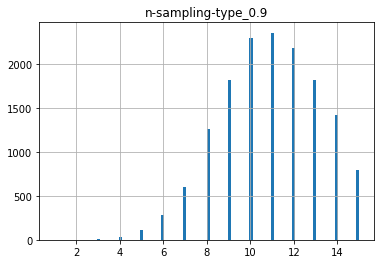

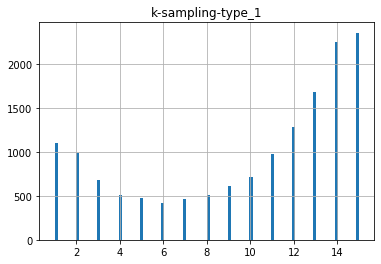

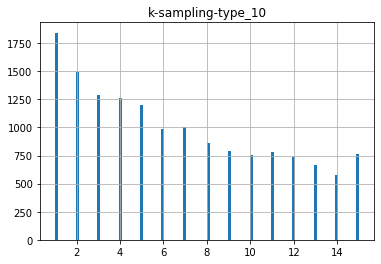

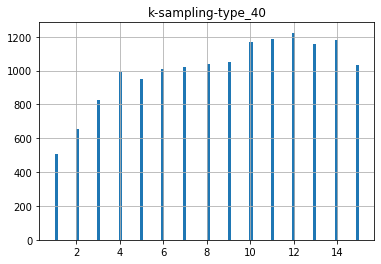

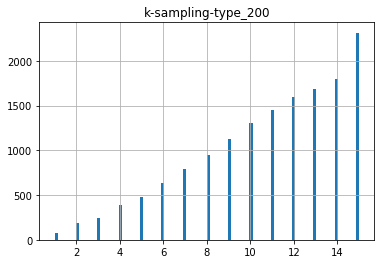

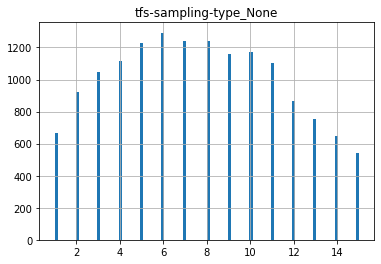

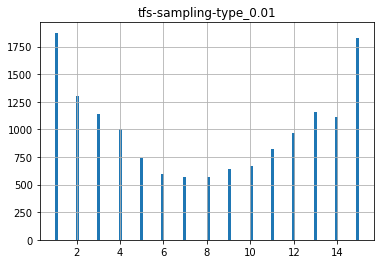

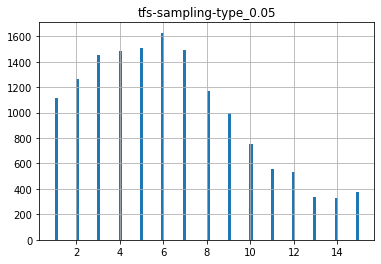

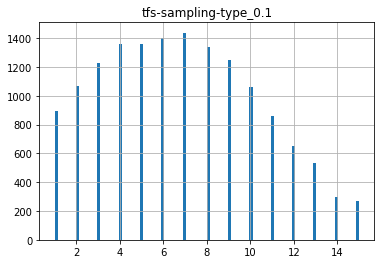

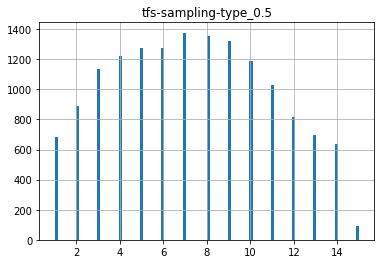

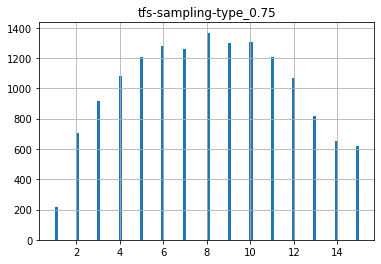

In [43]:
for c in tail_cdf_df_ranking.columns: 
    
    tail_cdf_df_ranking[c].hist(bins=100)
    plt.title(c)
    plt.show()

## Investigating the Samplings

In [ ]:
'''all_tail_cdfs = pickle.load(gzip.open('Tail_CDFs_dict_July14.pickle', 'rb')) # get this from "Analyze Logits"
all_tail_ids = pickle.load(gzip.open('Tail_IDs_dict_July14.pickle', 'rb'))'''

In [44]:

len(all_tail_cdfs.keys())

15

In [45]:
all_tail_cdfs.keys()

dict_keys(['n-sampling-type_0.1', 'n-sampling-type_0.25', 'n-sampling-type_0.5', 'n-sampling-type_0.75', 'n-sampling-type_0.9', 'k-sampling-type_1', 'k-sampling-type_10', 'k-sampling-type_40', 'k-sampling-type_200', 'tfs-sampling-type_None', 'tfs-sampling-type_0.01', 'tfs-sampling-type_0.05', 'tfs-sampling-type_0.1', 'tfs-sampling-type_0.5', 'tfs-sampling-type_0.75'])

In [46]:
all_tail_cdfs['n-sampling-type_0.25'].shape

(100, 150)

In [48]:
very_first = True

vals_dict = {'n': [0.1, 0.25, 0.5, 0.75, 0.9], 'k':[1,10,40,200], 'tfs':[None, 0.01, 0.05, 0.1, 0.5, 0.75 ]}

for key, params in vals_dict.items():
    print('Key is:', key)
    for par in params:
        
        specific_ids = all_tail_ids[key+'-sampling-type_'+str(par)][select_a_random_prompt,:]
        specific_cdfs = all_tail_cdfs[key+'-sampling-type_'+str(par)][select_a_random_prompt,:]

        if very_first ==True:

            tail_id_df = pd.DataFrame({key+'-sampling-type_'+str(par):specific_ids})
            tail_cdf_df = pd.DataFrame({key+'-sampling-type_'+str(par):specific_cdfs})
            very_first=False

        else:

            tail_id_df[key+'-sampling-type_'+str(par)] = specific_ids
            tail_cdf_df[key+'-sampling-type_'+str(par)] = specific_cdfs
        

Key is: n
Key is: k
Key is: tfs


In [49]:
tail_cdf_df.head()

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
0             0.201395              0.291523             0.511199   
1             0.333540              0.414254             0.641491   
2             0.104738              0.313464             0.523975   
3             0.326309              0.257579             0.518606   
4             0.151135              0.253460             0.511105   

   n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
0              0.752000             0.900066           0.201395   
1              0.769308             0.902971           0.333540   
2              0.753681             0.901810           0.028832   
3              0.752151             0.901412           0.740228   
4              0.751059             0.900186           0.503473   

   k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
0            0.467003            0.698653             0.875550   
1            0.875236            0.964187             0.991015   
2            0.891234            0.948363             0.976392   
3            0.935912            0.964723             0.977007   
4            0.136834            0.285034             0.543541   

   tfs-sampling-type_None  tfs-sampling-type_0.01  tfs-sampling-type_0.05  \
0                0.663139                0.249128                0.576415   
1                0.903042                0.333540                0.833878   
2                0.529856                1.000000                0.620740   
3                0.674216                0.999998                0.150304   
4                0.496930                0.320425                0.712857   

   tfs-sampling-type_0.1  tfs-sampling-type_0.5  tfs-sampling-type_0.75  
0               0.622176               0.658011                0.663139  
1               0.880666               0.911180                0.916667  
2               0.668775               0.701421                0.706876  
3               0.867727               0.885706                0.891051  
4               0.701881               0.729716                0.734866

In [93]:
key = 'tfs'
par = 0.01

In [94]:
tail_cdf_df[tail_cdf_df[key+'-sampling-type_'+str(par)].values>0.95]

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
2               0.104738              0.313464             0.523975   
3               0.326309              0.257579             0.518606   
24              0.999359              0.267998             0.505084   
27              0.151891              0.266019             0.987287   
31              0.129972              0.255837             0.514988   
33              0.152524              0.936518             0.807323   
34              0.136320              0.426696             0.505381   
37              0.236627              0.756897             0.505036   
40              0.242592              0.254902             0.528779   
49              0.770926              0.250537             0.567189   
51              0.739901              0.416095             0.530811   
53              0.221144              0.257906             0.833758   
56              0.566078              0.294231             0.882046   
64              0.239753              0.807114             0.500655   
67              0.205087              0.731267             0.502041   
79              0.994674              0.283305             0.501522   
95              0.917036              0.313138             0.567924   
108             0.996147              0.267381             0.624101   
112             0.707644              0.297132             0.512921   
119             0.992642              0.549219             0.525587   
124             0.994188              0.259036             0.616313   
134             0.994977              0.316196             0.761707   

     n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
2                0.753681             0.901810           0.028832   
3                0.752151             0.901412           0.740228   
24               0.834187             0.900160           0.998262   
27               0.751788             0.900003           0.849619   
31               0.750149             0.901279           0.198447   
33               0.795775             0.900354           0.052554   
34               0.768543             0.900015           0.322411   
37               0.827880             0.900036           0.810962   
40               0.750305             0.900514           0.999283   
49               0.750053             0.900034           0.162634   
51               0.750247             0.900168           0.999390   
53               0.755403             0.900028           0.929276   
56               0.751581             0.901039           0.999268   
64               0.750094             0.902736           0.624570   
67               0.750203             0.900414           0.999603   
79               0.760423             0.900045           0.546610   
95               0.751308             0.900962           0.596813   
108              0.750495             0.900199           0.953290   
112              0.768537             0.900998           0.956466   
119              0.751114             0.900146           0.994264   
124              0.757211             0.900073           0.964630   
134              0.750048             0.900122           0.997699   

     k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
2              0.891234            0.948363             0.976392   
3              0.935912            0.964723             0.977007   
24             0.417280            0.638403             0.990399   
27             0.688525            0.705836             0.943635   
31             0.729638            0.715809             0.840776   
33             0.611862            0.951337             0.868852   
34             0.663190            0.924812             0.485101   
37             0.698443            0.812426             0.953051   
40             0.296936            0.978581             0.641640   
49             0.960673            0.898781             0.898923   
51             0.571131            

In [95]:
tail_id_df.loc[list(tail_cdf_df[tail_cdf_df[key+'-sampling-type_'+str(par)].values>0.95].index)]

n-sampling-type_0.1  n-sampling-type_0.25  n-sampling-type_0.5  \
2                    9.0                   3.0                  3.0   
3                    1.0                   4.0                  6.0   
24                   1.0                   2.0                  9.0   
27                   1.0                   5.0                  1.0   
31                   1.0                   7.0                  3.0   
33                   1.0                   1.0                  2.0   
34                   1.0                   1.0                  5.0   
37                   1.0                   1.0                 16.0   
40                   1.0                   2.0                  6.0   
49                   1.0                  15.0                  3.0   
51                   1.0                   2.0                  6.0   
53                   1.0                   5.0                  1.0   
56                   1.0                   1.0                  1.0   
64                   1.0                   1.0                 16.0   
67                   1.0                   1.0                  8.0   
79                   1.0                   1.0                 21.0   
95                   1.0                   1.0                  2.0   
108                  1.0                   5.0                  2.0   
112                  1.0                   1.0                  6.0   
119                  1.0                   1.0                  9.0   
124                  1.0                   6.0                  1.0   
134                  1.0                   3.0                  1.0   

     n-sampling-type_0.75  n-sampling-type_0.9  k-sampling-type_1  \
2                    22.0                 12.0                1.0   
3                    39.0                 37.0                1.0   
24                    2.0                438.0                1.0   
27                   25.0                618.0                1.0   
31                  275.0                 39.0                1.0   
33                    3.0                 40.0                1.0   
34                   10.0                108.0                1.0   
37                    2.0                358.0                1.0   
40                   44.0                 18.0                1.0   
49                  560.0                468.0                1.0   
51                  396.0                301.0                1.0   
53                    4.0               1553.0                1.0   
56                   68.0                 36.0                1.0   
64                  128.0                 15.0                1.0   
67                  269.0                113.0                1.0   
79                   14.0                654.0                1.0   
95                   69.0                 21.0                1.0   
108                   9.0                335.0                1.0   
112                   5.0                 51.0                1.0   
119                  20.0                448.0                1.0   
124                  15.0                103.0                1.0   
134                 137.0                137.0                1.0   

     k-sampling-type_10  k-sampling-type_40  k-sampling-type_200  \
2                  10.0                40.0                200.0   
3                  10.0                40.0                200.0   
24                 10.0                40.0                200.0   
27                 10.0                40.0                200.0   
31                 10.0                40.0                200.0   
33                 10.0                40.0                200.0   
34                 10.0                40.0                200.0   
37                 10.0                40.0                200.0   
40                 10.0                40.0                200.0   
49                 10.0                40.0                200.0   
51                 10.0            

In [91]:
tail_id_df[tail_id_df[key+'-sampling-type_'+str(par)].values>50000]

Empty DataFrame
Columns: [n-sampling-type_0.1, n-sampling-type_0.25, n-sampling-type_0.5, n-sampling-type_0.75, n-sampling-type_0.9, k-sampling-type_1, k-sampling-type_10, k-sampling-type_40, k-sampling-type_200, tfs-sampling-type_None, tfs-sampling-type_0.01, tfs-sampling-type_0.05, tfs-sampling-type_0.1, tfs-sampling-type_0.5, tfs-sampling-type_0.75]
Index: []

In [89]:
del all_logits

all_logits = pickle.load( gzip.open('gpt-2_output/all_logits_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
text = pickle.load( gzip.open('gpt-2_output/all_text_'+key+'-sampling-type_'+str(par)+'-sampling-param_100-word-prompts_150-gen-length_100-number-of-prompts.pickle.gz', 'rb'))
len(all_logits)

4

In [54]:
batch_size = 25
from decodeLogits import *
batch = select_a_random_prompt//batch_size
ind = select_a_random_prompt - batch*batch_size

all_logits[batch][ind].shape

(50257, 150)

In [62]:
sps.shape

(50257,)

Prompt: 

[WP] Monsters under the bed exists and the world knows. This is your first night at a new job: the nightly security guard at the local bed store 
 Night at the Museum, Five Nights at Freddy's, The Monster Under My Bed… Those were all works which flashed through my mind as I made my way through the emptying parking lot. The store was technically closed, the last customers filtering out. When I told my friends what my new job was, they thought my uniform looked

 
Generation: 
 
 like a naked zombie.

I had to admit, I was a little surprised when I got the call from the town. The other night, the freaky Zombie Lord had been killed. The doctor had said that the Zombie Lord was a mutated version of the One-Eyed Zombie, but that he had been unleashed by the mass media and was now in a coma. The town was accusing the Zombie Lord of being responsible for the deaths of the other residents.

"What's wrong with the town?" I asked.

"I don't know, but they're starting to get worried."



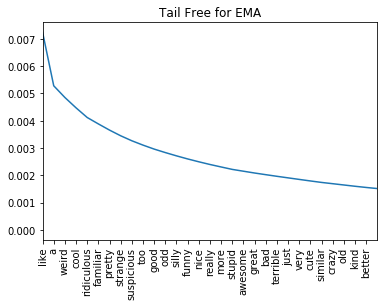

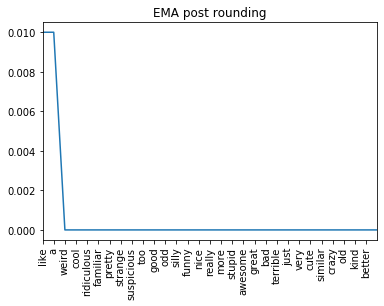

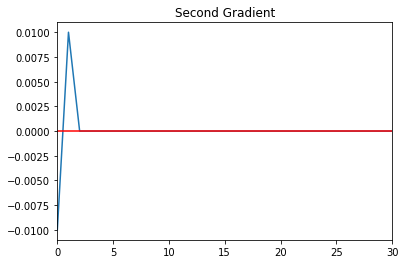

tail id is: 2


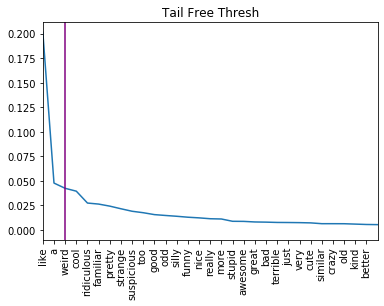

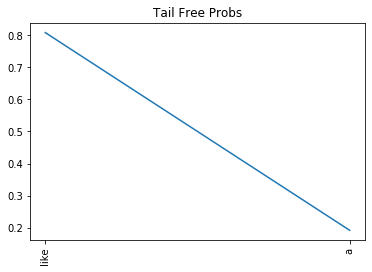

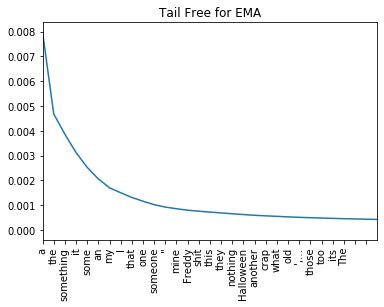

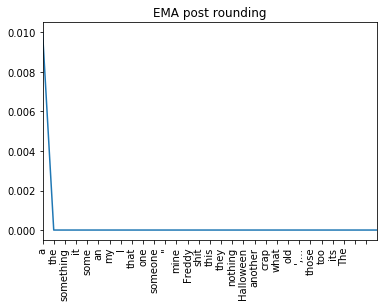

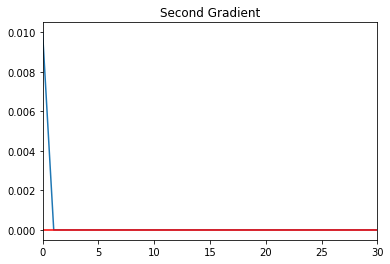

tail id is: 1


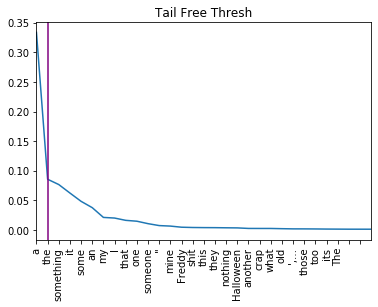

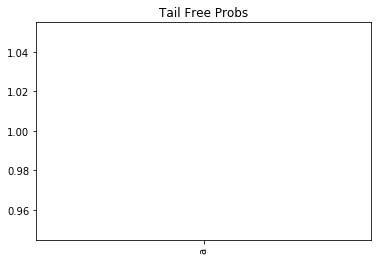

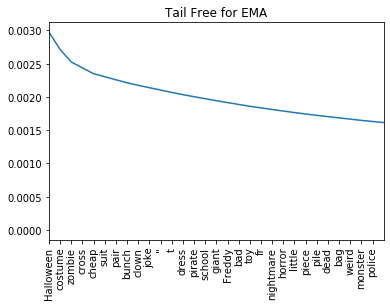

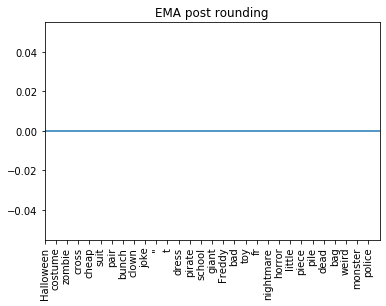

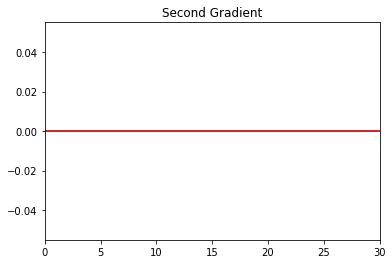

tail id is: 50255


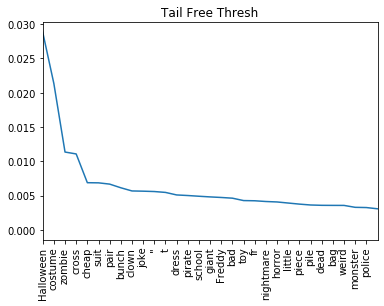

tail ID isnt specific enough, skipping this plot


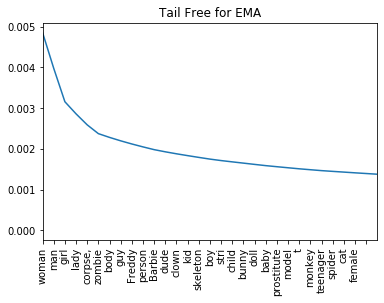

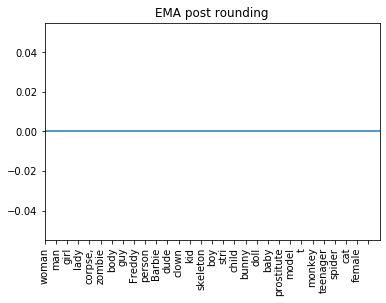

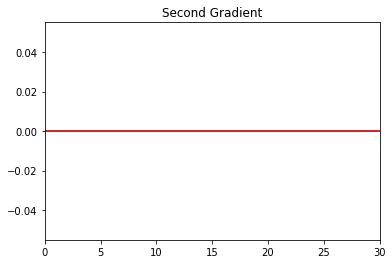

tail id is: 50255


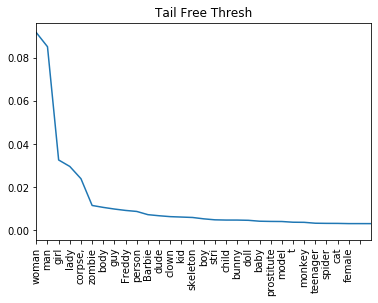

tail ID isnt specific enough, skipping this plot


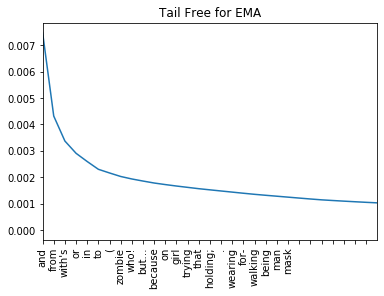

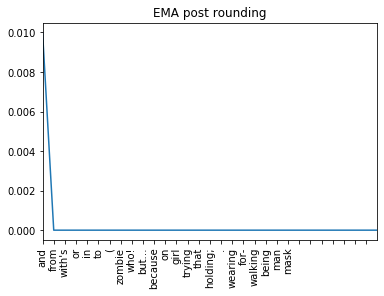

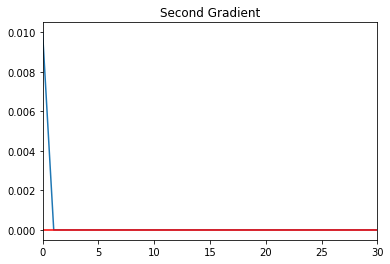

tail id is: 1


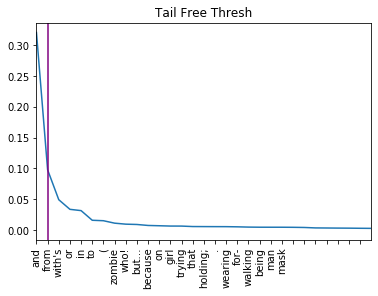

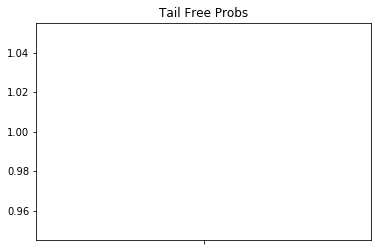

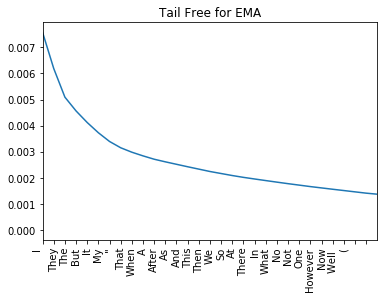

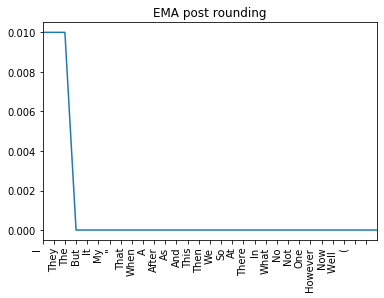

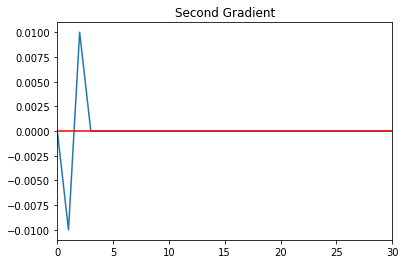

tail id is: 3


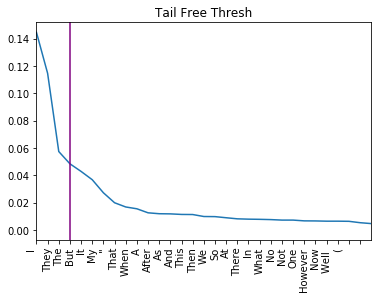

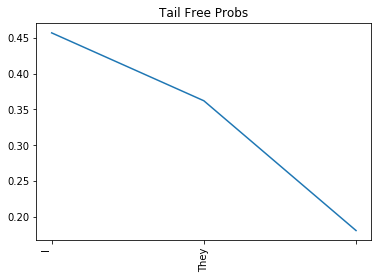

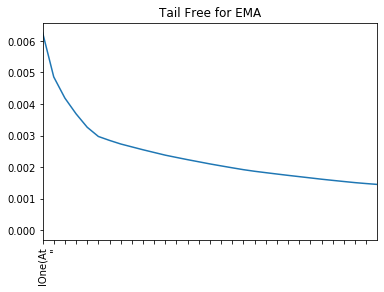

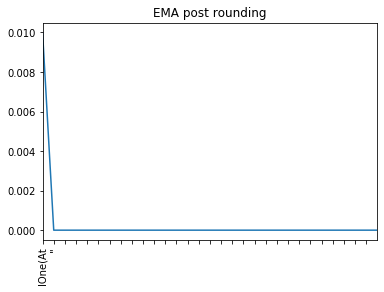

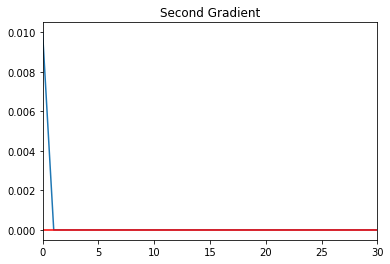

tail id is: 1


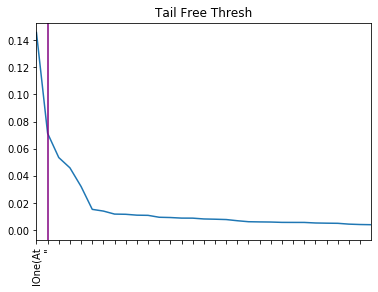

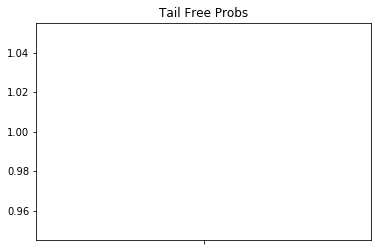

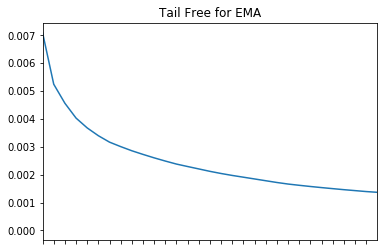

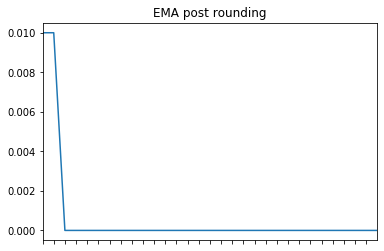

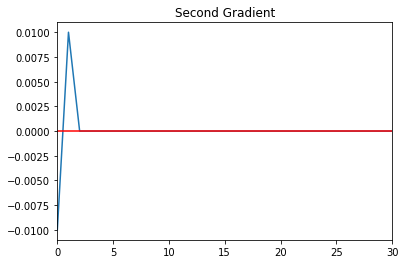

tail id is: 2


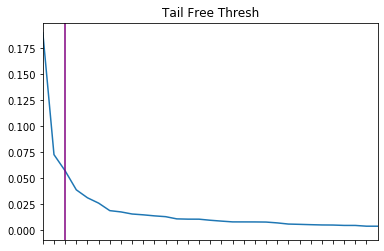

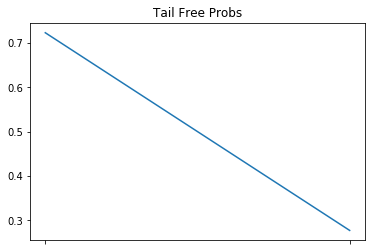

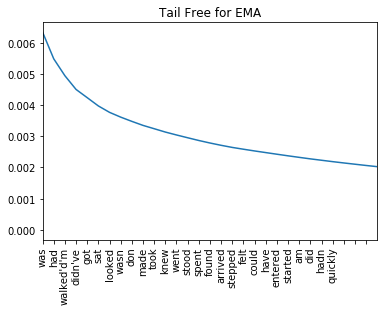

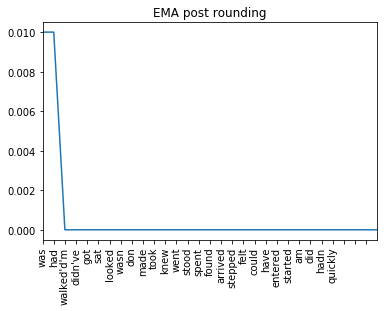

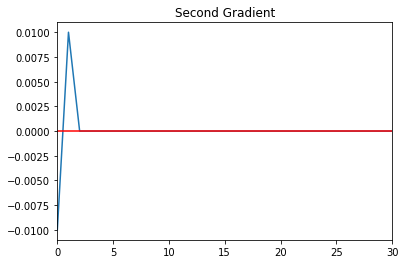

tail id is: 2


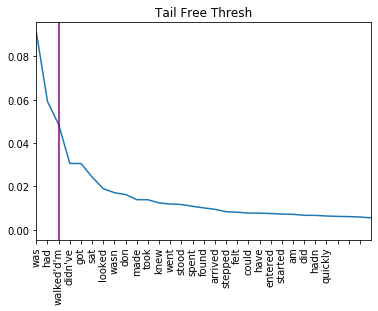

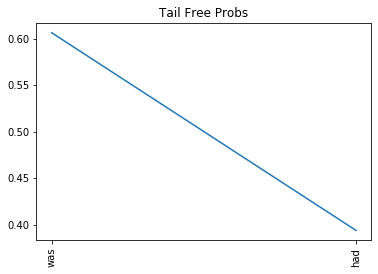

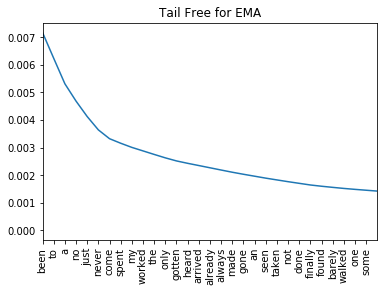

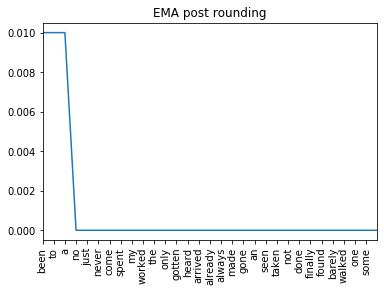

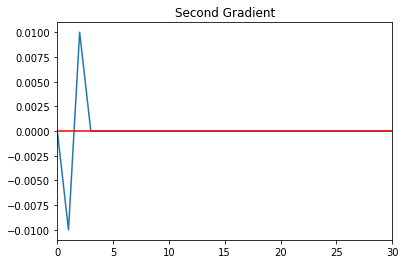

tail id is: 3


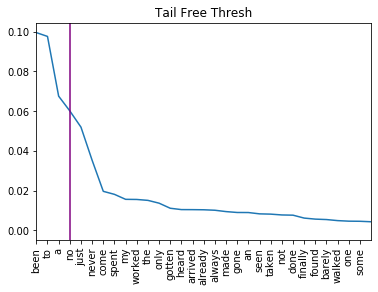

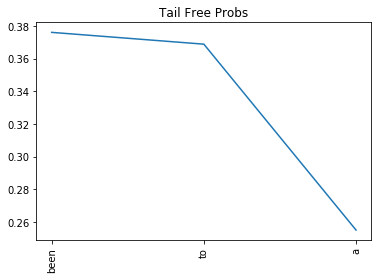

In [88]:
import matplotlib.pyplot as plt
from scipy.special import softmax
import pandas as pd    
import torch

#time_point = 1
plot_window_lim =30

'''def ema_eff(alpha,  vals, perc_acc=0.99 ):
    k = int(np.log(1-perc_acc)/np.log(1-alpha)) # this should be calculated at the start not in the loop!! 
    
    if k>vals.shape[0]: # CHECK THIS SHAPE MEASUREMENT
        k = vals.shape[0]
    
    # have something to check the tail id is less than the window size. 
    
    window_weights = (1-alpha)**np.arange(0,k)
    p = k-1
    # THIS CAN BE DONE IN A BATCH V EFFICIENTLY
    out = torch.nn.functional.conv1d(torch.from_numpy(vals).unsqueeze(0).unsqueeze(1).double(),torch.from_numpy(window_weights).unsqueeze(0).unsqueeze(1), padding=p )
    out = alpha*out[0,0,p:]
    #print(out.shape)
    
    return out.numpy()'''

def new_tfs(second, thresh):
    only_pos = np.abs(second)
    sec_indices = np.arange(len(second))
    sec_weights = only_pos/only_pos.sum()
    tail_id = np.argmax(np.cumsum(sec_weights)>thresh)+1
    return tail_id
        
def flat(sps, p):
    return sps.shape[0]-np.argmax(np.flip(sps)>p)

print('Prompt: \n')
print(decoder_text( text[batch][ind, :prompt_length]))
print('\n ====== \n ')
print('Generation: \n ')
gen = text[batch][ind, prompt_length:]
print(decoder_text( text[batch][ind, prompt_length:]))
print('======')

for time_point in range(0,10):
    
    sps = softmax(-np.sort(-all_logits[batch][ind, :, time_point]))
    indices = np.argsort(-all_logits[batch][ind, :, time_point])
    first = sps[1:] - sps[:-1]
    second = first[1:] - first[:-1]
    
    plt.plot(np.arange(sps.shape[0]),sps)
    
    if key == 'tfs':
        tail_id = new_tfs(sps, par)
    elif key=='flat':
        tail_id = flat(sps, par)
    
    
    print('tail id is:', tail_id)
    plt.axvline(tail_id, color='purple', linestyle='solid')
    
    plt.xlim([0,plot_window_lim])
    plt.xticks(np.arange(plot_window_lim), decoder_text(indices[:plot_window_lim]).split(' ')[1:], rotation='vertical')
    plt.title('Prob Dist')
    plt.show()
        
    '''plt.plot(np.arange(second.shape[0]),second)
    plt.xlim([0,plot_window_lim])
    plt.axhline(0.00001, color='red', linestyle='solid')
    plt.title('Second Gradient')
    plt.show()'''
    
    if tail_id>500:
        print('tail ID isnt specific enough, skipping this plot')
        print('=============')
        continue
        
    ids_above_tail = indices[:tail_id] # use these indices to determine what the words are and their probabilities. 
    tail_free_probs = softmax(all_logits[b, ids_above_tail, i])

    plt.plot(np.arange(tail_free_probs.shape[0]), tail_free_probs)
    plt.title('Tail Free Probs')
    plt.xticks(np.arange(tail_free_probs.shape[0]), decoder_text(ids_above_tail).split(' ')[1:], rotation='vertical')
    plt.show()

    #print('words in order',decoder_text(ids_above_tail))

    print('=============')